## Projet Python for data Analysis
## AOUES GAYA IBO 1 
## Dataset : Incident management process enriched event log Data Set

Il s'agit du journal d’événements d'un outil de gestion des incidents extrait d'un système d'audit  utilisé par une compagnie IT.
Le dataset fait 141 712 lignes/events pour 36 colonnes/attributs. 
L'objectif est de prédire le temps avant complétion d'un incident. Prédire à quel moment l'incident sera clos par un utilisateur en fonction des attributs du dataset. Une description du dataset avec la liste des attributs expliqués est présente dans le lien du précédent paragraphe. 

## A. import des données
## A.1 Import des données

In [691]:
import pandas as pd

In [692]:
dfr=pd.read_csv("incident_event_log.csv", sep=',', encoding='latin-1')

## A.2 afficher avec toutes les colonnes pour checker les données

In [693]:
pd.options.display.max_columns =None


## A.3 decouverte du dataset

In [694]:
dfr.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [695]:
dfr.shape

(141712, 36)

In [696]:
print(list(dfr.columns))

['number', 'incident_state', 'active', 'reassignment_count', 'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']


## B. Preprocessing
## B.1 Conversion Des dates en Datetime

In [697]:
from datetime import datetime
dfr['closed_at']=dfr.closed_at.astype(str)
dfr['closed_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in dfr['closed_at']]

dfr['opened_at']=dfr.opened_at.astype(str)
dfr['opened_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') for x in dfr['opened_at']]

dfr['sys_updated_at']=dfr.sys_updated_at.astype(str)
dfr['sys_updated_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M')for x in dfr['sys_updated_at']]

## Certaines dates sys_created_at sont inconnues
dfr['sys_created_at']=dfr.sys_created_at.astype(str)
dfr['sys_created_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') if x!= '?' else '?' for x in dfr['sys_created_at'] ]
## Certaines dates resolved_at sont inconnues
dfr['resolved_at']=dfr.resolved_at.astype(str)
dfr['resolved_at']= [datetime.strptime(x, '%d/%m/%Y %H:%M') if x!= '?' else '?' for x in dfr['resolved_at'] ]


## B.2  Calcul des intervalles de temps, de la cible Y

Duree_OpenToClose: Notre target/variable à prédire représente la durée entre le moment où l'incident a été ouvert jusqu'à sa cloture

In [698]:
## Duree open to close
dfr['Duree_openToClose']=dfr['closed_at']-dfr['opened_at']
dfr['Duree_openToClose']=(dfr['Duree_openToClose'].dt.days * 24) + dfr['Duree_openToClose'].dt.seconds / 3600

## B.3 Duree_ResolvedToClose: 
Cette durée correspond à la différence de temps entre la résolution d'un incident et sa cloture

In [699]:
# Duree resolved to close

dfr['Duree_ResolvedToClose']=dfr.apply(lambda row: row["resolved_at"] if row["resolved_at"]== '?' else row['closed_at'] - row['resolved_at']   , axis=1)

# Conversion en string du timedelta
dfr['Duree_ResolvedToClose']=dfr.Duree_ResolvedToClose.astype(str)
# Split du time delta en jours et heures
dfr.loc[dfr['Duree_ResolvedToClose']!='?', 'Duree_ResolvedToCloseTime']= dfr.Duree_ResolvedToClose.str.split(" ", expand=True)[2]
dfr.loc[dfr['Duree_ResolvedToClose']=='?', 'Duree_ResolvedToCloseTime']= '?'
dfr.loc[dfr['Duree_ResolvedToClose']!='?', 'Duree_ResolvedToCloseDays']= dfr.Duree_ResolvedToClose.str.split(" ", expand=True)[0]
dfr.loc[dfr['Duree_ResolvedToClose']=='?', 'Duree_ResolvedToCloseDays']= '?'

# split
dfr['Duree_ResolvedToCloseTime']=dfr.Duree_ResolvedToCloseTime.astype(str)
dfr['Duree_ResolvedToCloseTime']=dfr.apply(lambda row: row["Duree_ResolvedToClose"] if row["Duree_ResolvedToClose"]== '?' else  datetime.strptime(row['Duree_ResolvedToCloseTime'], '%H:%M:%S') , axis=1)

# Resultat resolved to close
dfr['Duree_ResolvedToClose']=dfr.apply(lambda row: row["Duree_ResolvedToClose"] if row["Duree_ResolvedToClose"]== '?' else int(row['Duree_ResolvedToCloseDays'])*24 + row['Duree_ResolvedToCloseTime'].hour + row['Duree_ResolvedToCloseTime'].minute/ 60  , axis=1)

# Suppression des colonnes temporaires
dfr=dfr.drop('Duree_ResolvedToCloseTime',1)
dfr=dfr.drop('Duree_ResolvedToCloseDays',1)



In [700]:
dfr[['number','opened_at','resolved_at','closed_at','Duree_openToClose','Duree_ResolvedToClose']].head(5)

,number,opened_at,resolved_at,closed_at,Duree_openToClose,Duree_ResolvedToClose
0,INC0000045,2016-02-29 01:16:00,2016-02-29 11:29:00,2016-03-05 12:00:00,130.733333,120.517
1,INC0000045,2016-02-29 01:16:00,2016-02-29 11:29:00,2016-03-05 12:00:00,130.733333,120.517
2,INC0000045,2016-02-29 01:16:00,2016-02-29 11:29:00,2016-03-05 12:00:00,130.733333,120.517
3,INC0000045,2016-02-29 01:16:00,2016-02-29 11:29:00,2016-03-05 12:00:00,130.733333,120.517
4,INC0000047,2016-02-29 04:40:00,2016-03-01 09:52:00,2016-03-06 10:00:00,149.333333,120.133


## C. Visualisations
## C.1.a Première visualisation: Durée réelle de résolution

Temps de resolution=  (Closed_at - opened_at) - Duree_ResolvedToClose

Le temps entre la résolution et la cloture est parfois consequent. 

Par exemple pour le premier incident= 130 h entre l'ouverture et la cloture mais il y'a 120 h entre le moment où l'incident est deja résolu et sa cloture.

Donc, le temps de résolution entre l'ouverture et la résolution est de seulement 10 h = 130 h - 120 h

In [701]:
## Calcul des temps de résolution.

dfr['Temps_Resolution']=dfr.apply(lambda row: row["Duree_ResolvedToClose"] if row["Duree_ResolvedToClose"]== '?' else row['Duree_openToClose']-row["Duree_ResolvedToClose"]   , axis=1)

## Remplacer les valeurs inconnues de Duree_ResolvedToClose par la moyenne
x=dfr[dfr['Duree_ResolvedToClose']!='?'].Duree_ResolvedToClose.mean()
dfr['Duree_ResolvedToClose']=dfr.apply(lambda row: row["Duree_ResolvedToClose"] if row["Duree_ResolvedToClose"]!= '?' else x, axis=1)

## Remplacer les valeurs inconnues de Temps_Resolution par la moyenne
x=dfr[dfr['Temps_Resolution']!='?'].Temps_Resolution.mean()
dfr['Temps_Resolution']=dfr.apply(lambda row: row["Temps_Resolution"] if row["Temps_Resolution"]!= '?' else x, axis=1)

In [702]:
dfr[['number','Duree_openToClose','Duree_ResolvedToClose','Temps_Resolution']].head(5)

,number,Duree_openToClose,Duree_ResolvedToClose,Temps_Resolution
0,INC0000045,130.733333,120.516667,10.216667
1,INC0000045,130.733333,120.516667,10.216667
2,INC0000045,130.733333,120.516667,10.216667
3,INC0000045,130.733333,120.516667,10.216667
4,INC0000047,149.333333,120.133333,29.200000


## C.1.b Première visualisation: Graphe de la répartition du temps de résolution par rapport a temps total

In [703]:
## Graph de la répartition
dfRepartitionTemps=dfr.copy()

## On groupe by sur le number, pour prendre en compte une seule fois chaque incident 
dfRepartitionTemps=dfRepartitionTemps.groupby('number').mean()

resolution=dfRepartitionTemps['Temps_Resolution'].mean()
cloture=dfRepartitionTemps['Duree_ResolvedToClose'].mean()

datas = {'Tempsresolution': [resolution], 'TempsDeCloture': [cloture]}
dfRepartition = pd.DataFrame(data=datas)

Text(0, 0.5, 'Temps en heure')

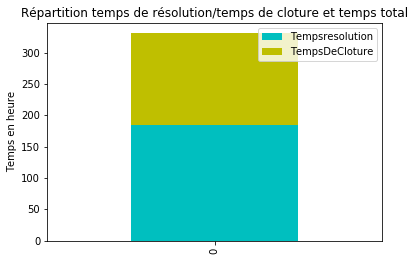

In [704]:
import matplotlib.pyplot as plt
my_colors = 'cy'

dfRepartition.plot(kind='bar',stacked=True, color=my_colors)

#Set descriptions:
plt.title("Répartition temps de résolution/temps de cloture et temps total")
plt.ylabel('Temps en heure')

In [705]:
dfRepartition

,Tempsresolution,TempsDeCloture
0,183.88058,147.074101


Au total: 330 h en moyenne pour un incident pour la durée Open to close
réparties de cette façon: 183 h en moyenne de temps de résolution et 147 h de temps de cloture

## C.2 Deuxième visualisation:  Durée Open to Close en fonction da la priorité de l'incident

In [706]:
## Valeurs possibles pour la priorité
dfr['priority'].value_counts(dropna=False)

3 - Moderate    132452
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: priority, dtype: int64

In [707]:
df_visu2=dfr[['number','priority','Duree_openToClose']].copy()

## On aggrége d'abord par incident pour pas avoir une moyenne fiable pour les incidents
df_visu2=df_visu2.groupby('number').agg({'priority':'last','Duree_openToClose':'mean'})
## On groupe by priority
df_visu2=df_visu2.groupby('priority').mean()


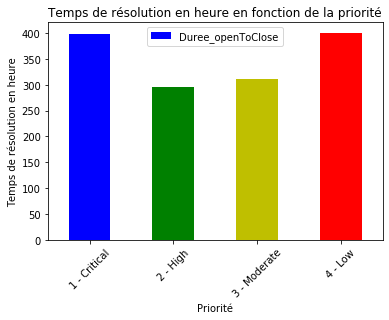

In [708]:
import matplotlib.pyplot as plt
my_colors = 'bgyr'
df_visu2.plot(kind='bar', color=my_colors)

#Set descriptions:
plt.title("Temps de résolution en heure en fonction de la priorité")
plt.ylabel('Temps de résolution en heure')
plt.xlabel('Priorité')

plt.xticks(rotation=45)

ax = plt.gca()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

De low jusqu'a high, plus la priorité augmente plus l'incident est résolut rapidement
Pour critical, c'est pour les gros problèmes qui nécessitent beaucoup de temps a etre résolus.



## C. 3 Troisième visualisation: Matrice de corrélation avec les colonnes numériques

Dans un premier on aggrège par le number de l'incident en retenant le max de reassignment_count, reopen_count, sys_mod_count, made_sla, u_priority_confirmation.


In [709]:
dfvisu3=dfr[['number','reassignment_count','reopen_count','sys_mod_count','made_sla','u_priority_confirmation','Duree_openToClose']].copy()
dfGrouped=dfGrouped.groupby('number').agg({'reassignment_count':'max',
                                           'reopen_count':'max',
                                           'sys_mod_count':'max',
                                           'made_sla':'max',
                                           'u_priority_confirmation':'max',
                                           'Duree_openToClose': 'max'})

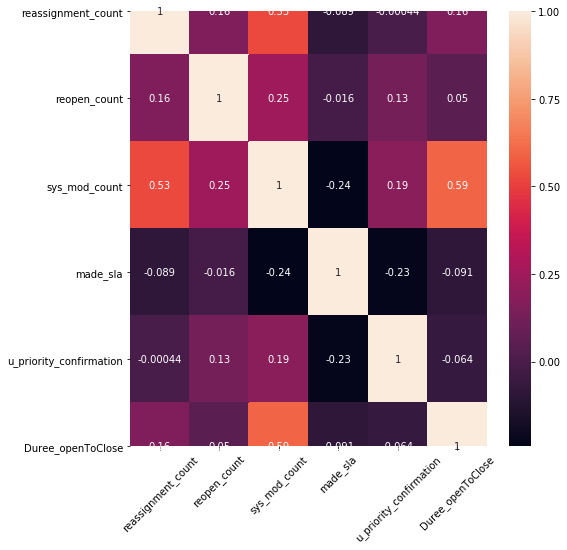

In [710]:
corrMatrix = dfvisu3.corr()

## On utilise searborn pour la heatmap
import seaborn as sn

plt.subplots(figsize=(8,8))
heat_map=sn.heatmap(corrMatrix, annot=True)

heat_map.set_xticklabels(heat_map.get_yticklabels(), rotation=45)

plt.show()

On voit bien que la variable qui est corrélée à Duree_openToClose est sys_mod_count. 
Quand on a aggrégé par number, on a retenu le max pour cette variable, qui correspond au nombre total de modifications subies par l'incident.

Plus l'incident a été modifié plus il prend du temps à etre résolu.

## D. Modèles

## D.1 Premier modèle simple sans aggréger sur number (id de l'incident): score faible, pas encore optimisé

In [711]:
### On prend que les variables numériques dans un premier temps
dfrNormal=dfr[['Duree_openToClose','active','made_sla','u_priority_confirmation','knowledge','sys_mod_count','reassignment_count','reopen_count']].copy()



## One hot encoing des variables catégoriques pour le dataset sans aggregation sur number

In [712]:
## On encode les variables catégoriques: dummification

dfP=dfr['priority'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["priority"], prefix='priority' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['closed_code'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["closed_code"], prefix='closed_code' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['category'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["category"], prefix='category' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['assignment_group'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["assignment_group"], prefix='assignment_group' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['opened_by'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["opened_by"], prefix='opened_by' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['contact_type'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["contact_type"], prefix='contact_type' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['impact'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["impact"], prefix='impact' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['urgency'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["urgency"], prefix='urgency' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['caused_by'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["caused_by"], prefix='caused_by' )
dfrNormal=dfrNormal.join(dum_dfp)

dfP=dfr['vendor'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["rfc"], prefix='rfc' )
dfrNormal=dfrNormal.join(dum_dfp)

In [713]:
dfrNormal.head(5)

,Duree_openToClose,active,made_sla,u_priority_confirmation,knowledge,sys_mod_count,reassignment_count,reopen_count,priority_1 - Critical,priority_2 - High,priority_3 - Moderate,priority_4 - Low,closed_code_?,closed_code_code 1,closed_code_code 10,closed_code_code 11,closed_code_code 12,closed_code_code 13,closed_code_code 14,closed_code_code 15,closed_code_code 16,closed_code_code 17,closed_code_code 2,closed_code_code 3,closed_code_code 4,closed_code_code 5,closed_code_code 6,closed_code_code 7,closed_code_code 8,closed_code_code 9,category_?,category_Category 10,category_Category 12,category_Category 13,category_Category 14,category_Category 15,category_Category 16,category_Category 17,category_Category 19,category_Category 2,category_Category 20,category_Category 21,category_Category 22,category_Category 23,category_Category 24,category_Category 25,category_Category 26,category_Category 27,category_Category 28,category_Category 29,category_Category 3,category_Category 30,category_Category 31,category_Category 32,category_Category 33,category_Category 34,category_Category 35,category_Category 36,category_Category 37,category_Category 38,category_Category 4,category_Category 40,category_Category 41,category_Category 42,category_Category 43,category_Category 44,category_Category 45,category_Category 46,category_Category 47,category_Category 48,category_Category 49,category_Category 5,category_Category 50,category_Category 51,category_Category 52,category_Category 53,category_Category 54,category_Category 55,category_Category 56,category_Category 57,category_Category 58,category_Category 59,category_Category 6,category_Category 61,category_Category 62,category_Category 63,category_Category 7,category_Category 8,category_Category 9,assignment_group_?,assignment_group_Group 10,assignment_group_Group 11,assignment_group_Group 12,assignment_group_Group 13,assignment_group_Group 14,assignment_group_Group 15,assignment_group_Group 16,assignment_group_Group 17,assignment_group_Group 18,assignment_group_Group 19,assignment_group_Group 2,assignment_group_Group 20,assignment_group_Group 21,assignment_group_Group 22,assignment_group_Group 23,assignment_group_Group 24,assignment_group_Group 25,assignment_group_Group 26,assignment_group_Group 27,assignment_group_Group 28,assignment_group_Group 29,assignment_group_Group 3,assignment_group_Group 30,assignment_group_Group 31,assignment_group_Group 32,assignment_group_Group 33,assignment_group_Group 34,assignment_group_Group 35,assignment_group_Group 36,assignment_group_Group 37,assignment_group_Group 38,assignment_group_Group 39,assignment_group_Group 4,assignment_group_Group 41,assignment_group_Group 43,assignment_group_Group 44,assignment_group_Group 45,assignment_group_Group 46,assignment_group_Group 47,assignment_group_Group 48,assignment_group_Group 49,assignment_group_Group 5,assignment_group_Group 50,assignment_group_Group 51,assignment_group_Group 53,assignment_group_Group 54,assignment_group_Group 55,assignment_group_Group 56,assignment_group_Group 57,assignment_group_Group 58,assignment_group_Group 59,assignment_group_Group 6,assignment_group_Group 60,assignment_group_Group 61,assignment_group_Group 62,assignment_group_Group 63,assignment_group_Group 64,assignment_group_Group 65,assignment_group_Group 66,assignment_group_Group 67,assignment_group_Group 68,assignment_group_Group 69,assignment_group_Group 7,assignment_group_Group 70,assignment_group_Group 71,assignment_group_Group 72,assignment_group_Group 73,assignment_group_Group 74,assignment_group_Group 75,assignment_group_Group 76,assignment_group_Group 77,assignment_group_Group 78,assignment_group_Group 79,assignment_group_Group 8,assignment_group_Group 80,assignment_group_Group 81,assignment_group_Group 82,assignment_group_Group 9,opened_by_?,opened_by_Opened by 10,opened_by_Opened by 101,opened_by_Opened by 104,opened_by_Opened by 106,opened_by_Opened by 108,opened_by_Opened by 109,opened_by_Opened by 111,opened_by_Opened by 11

## Split du dataset en train et test set pour le dataset sans aggregation

In [714]:

dfinal=dfrNormal.copy()

y=dfinal.Duree_openToClose
x=dfinal.drop('Duree_openToClose',axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1234)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((106284, 395), (35428, 395), (106284,), (35428,))

## Regression lineaire pour le dataset sans aggregation

In [715]:
performances =dict()

from sklearn.linear_model import LinearRegression
algorithme = LinearRegression()
algorithme.fit(x_train,y_train)
score=algorithme.score(x_test, y_test)
score

0.5706512094880525

In [716]:
performances['df_Normal_LinearRegression']=score

##  Decision tree regressor pour le dataset sans aggregation

In [717]:
from sklearn.tree import DecisionTreeRegressor
algorithme = DecisionTreeRegressor()
algorithme.fit(x_train, y_train)
score=algorithme.score(x_test,y_test)
score

0.5876733491411545

In [718]:
performances['df_Normal_DecisionTreeRegressor']=score

## 4.2 Modele avec Groupe By incident number 
## a. Regression linéaire

On groupe by sur le number (identifiant des incident)

On retient le max de: Duree_openToClose, reassignment_count, reopen_count, sys_mod_count, made_sla, u_priority_confirmation, knowledge
On retient le dernier: priority, closed_code, category, vendor, impact, urgency, caused_by, contact_type

In [719]:
dfGrouped=dfr.copy()
dfGrouped=dfGrouped.groupby('number').agg({'reassignment_count':'max',
                                           'reopen_count':'max',
                                           'sys_mod_count':'max',
                                           'made_sla':'max',
                                           'u_priority_confirmation':'max',
                                           'knowledge':'max',
                                           'priority': 'last',
                                           'closed_code':'last',
                                           'category':'last',
                                           'vendor':'last',
                                           'impact':'last',
                                           'urgency':'last',
                                           'caused_by':'last',
                                           'contact_type':'last',
                                           'Duree_openToClose': 'max'})


## One hot encoing pour le dataset grouped by number pour les variables catégoriques

In [720]:
dfP=dfGrouped['priority'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["priority"], prefix='priority' )
dfGrouped=dfGrouped.join(dum_dfp)

dfP=dfGrouped['closed_code'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["closed_code"], prefix='closed_code' )
dfGrouped=dfGrouped.join(dum_dfp)

dfP=dfGrouped['category'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["category"], prefix='category' )
dfGrouped=dfGrouped.join(dum_dfp)

dfP=dfGrouped['vendor'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["vendor"], prefix='vendor' )
dfGrouped=dfGrouped.join(dum_dfp)

dfP=dfGrouped['impact'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["impact"], prefix='impact' )
dfGrouped=dfGrouped.join(dum_dfp)

dfP=dfGrouped['urgency'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["urgency"], prefix='urgency' )
dfGrouped=dfGrouped.join(dum_dfp)

dfP=dfGrouped['caused_by'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["caused_by"], prefix='caused_by' )
dfGrouped=dfGrouped.join(dum_dfp)

dfP=dfGrouped['contact_type'].copy()
dum_dfp = pd.get_dummies(dfP, columns=["contact_type"], prefix='contact_type' )
dfGrouped=dfGrouped.join(dum_dfp)

dfGrouped=dfGrouped.drop(['priority','closed_code','category','vendor','impact','urgency','caused_by','contact_type','contact_type'],1)

In [721]:
dfr2.head(5)

,reassignment_count,reopen_count,sys_mod_count,made_sla,u_priority_confirmation,knowledge,Duree_openToClose,priority_1 - Critical,priority_2 - High,priority_3 - Moderate,priority_4 - Low,closed_code_?,closed_code_code 1,closed_code_code 10,closed_code_code 11,closed_code_code 12,closed_code_code 13,closed_code_code 14,closed_code_code 15,closed_code_code 16,closed_code_code 17,closed_code_code 2,closed_code_code 3,closed_code_code 4,closed_code_code 5,closed_code_code 6,closed_code_code 7,closed_code_code 8,closed_code_code 9,category_?,category_Category 10,category_Category 12,category_Category 13,category_Category 14,category_Category 16,category_Category 17,category_Category 19,category_Category 2,category_Category 20,category_Category 21,category_Category 22,category_Category 23,category_Category 24,category_Category 25,category_Category 26,category_Category 28,category_Category 29,category_Category 30,category_Category 31,category_Category 32,category_Category 33,category_Category 34,category_Category 35,category_Category 37,category_Category 38,category_Category 4,category_Category 40,category_Category 42,category_Category 43,category_Category 44,category_Category 45,category_Category 46,category_Category 47,category_Category 48,category_Category 5,category_Category 50,category_Category 51,category_Category 52,category_Category 53,category_Category 54,category_Category 55,category_Category 56,category_Category 57,category_Category 58,category_Category 59,category_Category 6,category_Category 61,category_Category 62,category_Category 63,category_Category 7,category_Category 8,category_Category 9,vendor_?,vendor_Vendor 1,vendor_code 8s,impact_1 - High,impact_2 - Medium,impact_3 - Low,urgency_1 - High,urgency_2 - Medium,urgency_3 - Low,caused_by_?,caused_by_CHG0000097,caused_by_CHG0000132,caused_by_CHG0001327,contact_type_Direct opening,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service
number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INC0000045,0,0,4,True,False,True,130.733333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
INC0000047,1,0,8,True,False,True,149.333333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
INC0000057,0,0,6,True,False,True,140.833333,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
INC0000060,0,0,3,True,False,True,174.366667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
INC0000062,1,0,7,True,False,True,129.033333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0


## Split en train set et test set pour le dataset Grouped by

In [722]:
dfinal=dfGrouped.copy()
y=dfinal.Duree_openToClose
x=dfinal.drop('Duree_openToClose',axis=1)

In [723]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1234)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18688, 99), (6230, 99), (18688,), (6230,))

## Regression lineaire simple pour le dataset Grouped by number

In [724]:
from sklearn.linear_model import LinearRegression
algorithme = LinearRegression()
algorithme.fit(x_train,y_train)
score=algorithme.score(x_test, y_test)
score

0.8697542020846498

In [725]:
performances['df_grouped_LinearRegression']=score

## b. Decision tree regressor  pour le dataset Grouped by number


In [726]:
from sklearn.tree import DecisionTreeRegressor
algorithme = DecisionTreeRegressor()
algorithme.fit(x_train, y_train)
score=algorithme.score(x_test,y_test)
score

0.7663143083178563

In [727]:
performances['df_grouped_DecisionTreeRegressor']=score

## c. Random Forest  pour le dataset Grouped by number


In [728]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = { 'n_estimators':30 }
algorithme = RandomForestRegressor(**hyperparametres)
algorithme.fit(x_train,y_train)
score=algorithme.score(x_test,y_test)
score

0.8574032658015894

In [729]:
performances['df_grouped_RandomForest']=score

## d. Catboost pour le dataset Grouped by number

In [731]:
from catboost import CatBoostRegressor
algorithme = CatBoostRegressor(task_type="CPU")
algorithme.fit(x_train, y_train)
score=algorithme.score(x_test,y_test)
score


0:	learn: 526.5427800	total: 189ms	remaining: 3m 9s
1:	learn: 515.3886739	total: 201ms	remaining: 1m 40s
2:	learn: 504.6644148	total: 205ms	remaining: 1m 8s
3:	learn: 494.2101603	total: 209ms	remaining: 52.1s
4:	learn: 484.3889583	total: 265ms	remaining: 52.8s
5:	learn: 474.6001420	total: 304ms	remaining: 50.3s
6:	learn: 465.3817052	total: 311ms	remaining: 44.2s
7:	learn: 456.4740041	total: 320ms	remaining: 39.6s
8:	learn: 447.2901731	total: 329ms	remaining: 36.2s
9:	learn: 439.3635690	total: 342ms	remaining: 33.9s
10:	learn: 431.5795386	total: 349ms	remaining: 31.4s
11:	learn: 423.5139547	total: 354ms	remaining: 29.2s
12:	learn: 415.5416062	total: 360ms	remaining: 27.3s
13:	learn: 408.0253985	total: 365ms	remaining: 25.7s
14:	learn: 400.9110659	total: 370ms	remaining: 24.3s
15:	learn: 393.8397473	total: 376ms	remaining: 23.1s
16:	learn: 386.8450831	total: 383ms	remaining: 22.2s
17:	learn: 380.4263195	total: 453ms	remaining: 24.7s
18:	learn: 374.3203111	total: 499ms	remaining: 25.8s
19

175:	learn: 205.7835961	total: 2.01s	remaining: 9.43s
176:	learn: 205.7169837	total: 2.02s	remaining: 9.41s
177:	learn: 205.6335331	total: 2.03s	remaining: 9.38s
178:	learn: 205.5922151	total: 2.05s	remaining: 9.42s
179:	learn: 205.5460711	total: 2.06s	remaining: 9.38s
180:	learn: 205.4349508	total: 2.07s	remaining: 9.39s
181:	learn: 205.3340987	total: 2.09s	remaining: 9.38s
182:	learn: 205.2618695	total: 2.1s	remaining: 9.36s
183:	learn: 205.2232977	total: 2.1s	remaining: 9.32s
184:	learn: 205.1572833	total: 2.11s	remaining: 9.28s
185:	learn: 205.1133744	total: 2.11s	remaining: 9.25s
186:	learn: 205.0619788	total: 2.12s	remaining: 9.21s
187:	learn: 205.0064914	total: 2.13s	remaining: 9.2s
188:	learn: 204.9826023	total: 2.14s	remaining: 9.17s
189:	learn: 204.8231056	total: 2.16s	remaining: 9.21s
190:	learn: 204.6542767	total: 2.16s	remaining: 9.17s
191:	learn: 204.6105590	total: 2.17s	remaining: 9.13s
192:	learn: 204.6002034	total: 2.17s	remaining: 9.1s
193:	learn: 204.5389189	total: 2

328:	learn: 196.7725411	total: 3.07s	remaining: 6.25s
329:	learn: 196.7395552	total: 3.07s	remaining: 6.24s
330:	learn: 196.7223241	total: 3.08s	remaining: 6.21s
331:	learn: 196.7014333	total: 3.08s	remaining: 6.2s
332:	learn: 196.6709580	total: 3.09s	remaining: 6.18s
333:	learn: 196.5961901	total: 3.09s	remaining: 6.17s
334:	learn: 196.5244524	total: 3.1s	remaining: 6.15s
335:	learn: 196.4979557	total: 3.1s	remaining: 6.14s
336:	learn: 196.4700473	total: 3.11s	remaining: 6.12s
337:	learn: 196.4287446	total: 3.12s	remaining: 6.11s
338:	learn: 196.4048918	total: 3.13s	remaining: 6.1s
339:	learn: 196.3729172	total: 3.13s	remaining: 6.08s
340:	learn: 196.3366601	total: 3.14s	remaining: 6.07s
341:	learn: 196.3011276	total: 3.14s	remaining: 6.05s
342:	learn: 196.2297328	total: 3.15s	remaining: 6.03s
343:	learn: 196.1868116	total: 3.15s	remaining: 6.01s
344:	learn: 196.1154006	total: 3.16s	remaining: 6s
345:	learn: 196.0985899	total: 3.16s	remaining: 5.98s
346:	learn: 196.0713692	total: 3.17

509:	learn: 190.2823380	total: 4.09s	remaining: 3.93s
510:	learn: 190.2670715	total: 4.09s	remaining: 3.92s
511:	learn: 190.2457214	total: 4.1s	remaining: 3.9s
512:	learn: 190.1947119	total: 4.1s	remaining: 3.9s
513:	learn: 190.1775226	total: 4.11s	remaining: 3.88s
514:	learn: 190.1463885	total: 4.11s	remaining: 3.87s
515:	learn: 190.1301268	total: 4.12s	remaining: 3.86s
516:	learn: 190.1160285	total: 4.12s	remaining: 3.85s
517:	learn: 190.0660039	total: 4.13s	remaining: 3.84s
518:	learn: 190.0167518	total: 4.13s	remaining: 3.83s
519:	learn: 189.9765403	total: 4.14s	remaining: 3.82s
520:	learn: 189.9345125	total: 4.15s	remaining: 3.81s
521:	learn: 189.8533719	total: 4.15s	remaining: 3.8s
522:	learn: 189.8367541	total: 4.16s	remaining: 3.79s
523:	learn: 189.8277924	total: 4.16s	remaining: 3.78s
524:	learn: 189.8129303	total: 4.17s	remaining: 3.77s
525:	learn: 189.8041664	total: 4.17s	remaining: 3.76s
526:	learn: 189.7865671	total: 4.18s	remaining: 3.75s
527:	learn: 189.7380937	total: 4.

676:	learn: 185.5784996	total: 4.95s	remaining: 2.36s
677:	learn: 185.5616460	total: 4.95s	remaining: 2.35s
678:	learn: 185.5449483	total: 4.96s	remaining: 2.34s
679:	learn: 185.5366466	total: 4.96s	remaining: 2.33s
680:	learn: 185.5023555	total: 4.97s	remaining: 2.33s
681:	learn: 185.4876013	total: 4.98s	remaining: 2.32s
682:	learn: 185.4794507	total: 4.99s	remaining: 2.31s
683:	learn: 185.4634852	total: 4.99s	remaining: 2.31s
684:	learn: 185.4429544	total: 5s	remaining: 2.3s
685:	learn: 185.4160817	total: 5.01s	remaining: 2.29s
686:	learn: 185.4049838	total: 5.02s	remaining: 2.29s
687:	learn: 185.3728471	total: 5.02s	remaining: 2.28s
688:	learn: 185.3550898	total: 5.03s	remaining: 2.27s
689:	learn: 185.3390530	total: 5.04s	remaining: 2.26s
690:	learn: 185.3040277	total: 5.04s	remaining: 2.25s
691:	learn: 185.2914119	total: 5.05s	remaining: 2.25s
692:	learn: 185.2733332	total: 5.05s	remaining: 2.24s
693:	learn: 185.2404047	total: 5.06s	remaining: 2.23s
694:	learn: 185.2059148	total: 5

857:	learn: 181.9840595	total: 5.97s	remaining: 987ms
858:	learn: 181.9784370	total: 5.97s	remaining: 980ms
859:	learn: 181.9636608	total: 5.98s	remaining: 973ms
860:	learn: 181.9616832	total: 5.98s	remaining: 966ms
861:	learn: 181.9454685	total: 5.99s	remaining: 958ms
862:	learn: 181.9368317	total: 5.99s	remaining: 951ms
863:	learn: 181.9234086	total: 6s	remaining: 944ms
864:	learn: 181.9067559	total: 6s	remaining: 937ms
865:	learn: 181.8952858	total: 6.01s	remaining: 930ms
866:	learn: 181.8774506	total: 6.02s	remaining: 923ms
867:	learn: 181.8644067	total: 6.02s	remaining: 916ms
868:	learn: 181.8589129	total: 6.03s	remaining: 909ms
869:	learn: 181.8462129	total: 6.03s	remaining: 902ms
870:	learn: 181.8237359	total: 6.04s	remaining: 894ms
871:	learn: 181.8187312	total: 6.04s	remaining: 887ms
872:	learn: 181.7965933	total: 6.05s	remaining: 880ms
873:	learn: 181.7752912	total: 6.05s	remaining: 872ms
874:	learn: 181.7518767	total: 6.05s	remaining: 865ms
875:	learn: 181.7364975	total: 6.0

0.9064716896673904

In [732]:
performances['df_grouped_Catboost']=score

## e. ExtratreesRegressor pour le dataset Grouped by number

In [739]:
from sklearn.ensemble import ExtraTreesRegressor

algorithme = ExtraTreesRegressor()
algorithme.fit(x_train, y_train)
score=algorithme.score(x_test,y_test)
score

C:\Users\baya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8352640921666583

In [740]:
performances['df_grouped_ExtraTreesRegressor']=score


## f. GradientBoosting pour le dataset Grouped by number

In [746]:
from sklearn.ensemble import GradientBoostingRegressor
algorithme = GradientBoostingRegressor()
algorithme.fit(x_train, y_train)
score=algorithme.score(x_test,y_test)
score

0.9077720433546491

In [747]:
performances['df_grouped_GradientBoosting']=score

## E.  GridSearch: trouver les meilleurs parametres

In [755]:
from sklearn.model_selection import GridSearchCV

estimator=RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
     

In [759]:
grid.best_score_

0.8340218253245473

In [760]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 30}

## On peut alors les utiliser



In [762]:
algorithme=RandomForestRegressor(bootstrap=True,max_features='auto',min_samples_split=8, n_estimators=30)

algorithme.fit(x_train,y_train)
score=algorithme.score(x_test,y_test)
score

0.9002444176026158

ON voit une amélioration en passant de 0,85 à 0,90

In [763]:
performances['df_grouped_RandomForestWithCV']=score

## F. Visualisation des performances des différents algos

In [764]:
from collections import OrderedDict
dico = OrderedDict(performances)

import pandas as pd
df = pd.DataFrame()
df["perf"] = dico.values()
df["algo"] = dico.keys()
df['nom_algo'] = df.algo.apply(lambda algo: str(algo).split('(')[0])
df.set_index('nom_algo', inplace=True)
df

,perf,algo
nom_algo,,
df_Normal_LinearRegression,0.570651,df_Normal_LinearRegression
df_Normal_DecisionTreeRegressor,0.587673,df_Normal_DecisionTreeRegressor
df_grouped_LinearRegression,0.869754,df_grouped_LinearRegression
df_grouped_DecisionTreeRegressor,0.766314,df_grouped_DecisionTreeRegressor
df_grouped_RandomForest,0.857403,df_grouped_RandomForest
df_grouped_Catboost,0.906472,df_grouped_Catboost
df_grouped_ExtraTreesRegressor,0.835264,df_grouped_ExtraTreesRegressor
df_grouped_GradientBoosting,0.907772,df_grouped_GradientBoosting
df_grouped_RandomForestWithCV,0.900244,df_grouped_RandomForestWithCV


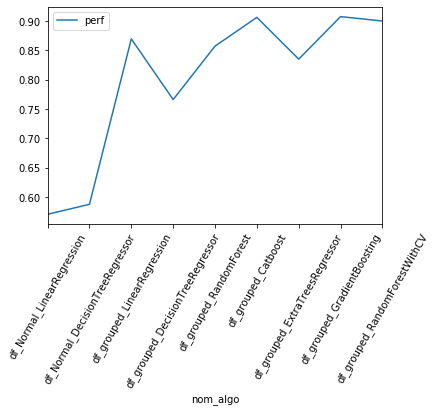

In [765]:
df[["perf"]].plot(kind='line', rot=60)
